# Telecom Churn - ML Group Case Study

### Business Problem Overview

    In the telecom industry, customers are able to choose from multiple service providers and actively switch 
    from one operator to another. 
    In this highly competitive market, the telecommunications industry experiences 
    an average of 15-25% annual churn rate. 

    Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, 
    customer retention has now become even more important than customer acquisition.

### 1. Importing Libraries:-

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

from sklearn.cross_validation import train_test_split
from imblearn.over_sampling import SMOTE
#Improting the PCA module
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.grid_search import GridSearchCV

from sklearn.ensemble import BaggingClassifier

import sklearn.ensemble as en
import pandas as pd

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

%matplotlib inline

### 2. Data Preparation and Understanding:-

#### Data Understanding:-

    In this project we will analyse customer-level data of a leading telecom firm, build predictive models 
    to identify customers at high risk of churn and identify the main indicators of churn.

    Features of the dataset at a glance:-

    A. There are 226 columns and 0 to 99999 entries in each columns.
    B. There of 179 columns of float64 type , 35 columns of int64 type and 12 columns of object type. 


In [6]:
### Importing data
telecom_data= pd.read_csv("telecom_churn_data.csv")

In [8]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [9]:
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### Data Dictionary:-

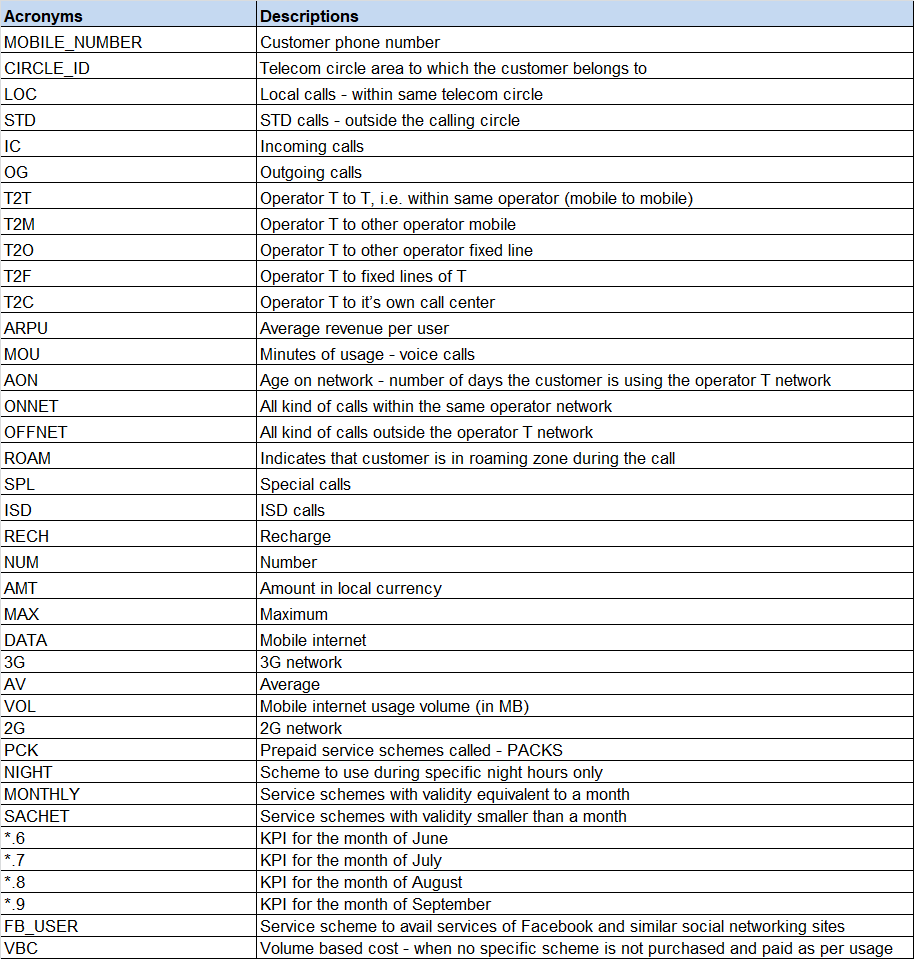

In [10]:
# summarising number of missing values in each column
telecom_data.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

In [11]:
# percentage of missing values in each column
round(telecom_data.isnull().sum()/len(telecom_data.index), 2)*100

mobile_number            0.0
circle_id                0.0
loc_og_t2o_mou           1.0
std_og_t2o_mou           1.0
loc_ic_t2o_mou           1.0
last_date_of_month_6     0.0
last_date_of_month_7     1.0
last_date_of_month_8     1.0
last_date_of_month_9     2.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
arpu_9                   0.0
onnet_mou_6              4.0
onnet_mou_7              4.0
onnet_mou_8              5.0
onnet_mou_9              8.0
offnet_mou_6             4.0
offnet_mou_7             4.0
offnet_mou_8             5.0
offnet_mou_9             8.0
roam_ic_mou_6            4.0
roam_ic_mou_7            4.0
roam_ic_mou_8            5.0
roam_ic_mou_9            8.0
roam_og_mou_6            4.0
roam_og_mou_7            4.0
roam_og_mou_8            5.0
roam_og_mou_9            8.0
loc_og_t2t_mou_6         4.0
                        ... 
arpu_2g_9               74.0
night_pck_user_6        75.0
night_pck_user_7        74.0
night_pck_user

Let's check whether some rows have a large number of missing values.

In [12]:
# missing values in rows
telecom_data.isnull().sum(axis=1)

0         97
1         20
2         30
3         40
4         30
5         40
6         40
7         69
8         20
9         30
10        49
11        31
12        40
13        30
14        40
15        69
16        40
17        40
18        40
19        10
20        40
21        40
22        40
23        10
24        40
25        40
26        40
27        40
28        30
29        69
        ... 
99969     20
99970     10
99971     40
99972     30
99973     41
99974     40
99975     40
99976     40
99977     40
99978    162
99979     40
99980     10
99981     11
99982     10
99983     99
99984      0
99985     41
99986      0
99987     30
99988     10
99989     40
99990     30
99991     40
99992     40
99993    164
99994     40
99995     40
99996    118
99997      0
99998    120
Length: 99999, dtype: int64

### Filter high-value customers -

    Defination of high-value customers as follows:-
    Those who have recharged with an amount more than or equal to X, where X is the 70th percentile 
    of the average recharge amount in the first two months (the good phase).

#### Note: - High value customer has been filtered from follwing columns -
    
    'total_rech_amt_6' - Total recharge amount (voice) for the month of 6
    'total_rech_amt_7' - Total recharge amount (voice) for the month of 7
    
    'total_rech_data_6' - Count of recharge amount (data) for the month of 6
    'total_rech_data_7' - Count of recharge amount (data) for the month of 7
    
    'av_rech_amt_data_6' - Avg. of recharge amount (data) for the month of 6
    'av_rech_amt_data_7' - Avg. of recharge amount (data) for the month of 7

    Total recharge amount per month ==> total_rech_amt_mnth + (total_rech_data_mnth * av_rech_amt_data_mnth )

In [16]:
#replacing null to avoid compulational issue --
telecom_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']] =  telecom_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].replace(np.nan, 0, regex=True)

In [17]:
## Creating total amount KPI for Data:-

telecom_data['total_rech_amt_data_6'] = telecom_data.apply(lambda x: (x['total_rech_data_6']*x['av_rech_amt_data_6']),axis =1)
telecom_data['total_rech_amt_data_7'] = telecom_data.apply(lambda x: (x['total_rech_data_7']*x['av_rech_amt_data_7']),axis =1)

In [18]:
## Creating average amount KPI for data + talktime:-

telecom_data['avg_rech_amt_6_7'] = telecom_data.apply(lambda x: ((x['total_rech_amt_6']+x['total_rech_amt_7']+x['total_rech_amt_data_6']+x['total_rech_amt_data_7'])/2),axis =1)

#### Decile Analysis:-
    We have to choose customers belonging to 70 percentile and above

In [19]:
telecom_data['avg_rech_amt_6_7'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).T

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
10%         60.000000
20%        108.500000
30%        155.000000
40%        209.500000
50%        275.000000
60%        360.000000
70%        478.000000
80%        656.500000
90%       1028.000000
max      61236.000000
Name: avg_rech_amt_6_7, dtype: float64

In [20]:
#Lets create a KPI on decile
telecom_data['avg_rech_decile'] = pd.qcut(telecom_data['avg_rech_amt_6_7'], 10, labels=False)

In [21]:
##Choosing customers belonging to 70 percentile and above
telecom_data_high_value = telecom_data[telecom_data.avg_rech_decile >= 7 ]

In [22]:
telecom_data_high_value.count()[0]

29953

   We have filtered out **29.9K** high value customers - we will be working on dataset - **telecom_data_high_value** having high valued customers only

### Creating Some KPIs


### Frequency of customer buying voice and data pack in first 3 months

**Frequency of buying voice pack**

In [23]:
def churnfreqrec(telecom_data_high_value):
    i = 0
    a = np.where(telecom_data_high_value[['date_of_last_rech_6']].isnull(),0,1)
    i = i+a
    b = np.where(telecom_data_high_value[['date_of_last_rech_7']].isnull(),0,1)
    i=i+b
    c = np.where(telecom_data_high_value[['date_of_last_rech_8']].isnull(),0,1)
    i=i+c
    return i

In [24]:
telecom_data_high_value['Frequency_recharge_voice'] = 0
telecom_data_high_value['Frequency_recharge_voice'] = telecom_data_high_value.apply(churnfreqrec, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Frequency of buying data pack**

In [28]:
telecom_data_high_value['Frequency_recharge_data'] = 0

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
telecom_data_high_value['Frequency_recharge_data'] = telecom_data_high_value.apply(lambda x: (x['total_rech_data_6']+x['total_rech_data_7']+x['total_rech_data_8']),axis =1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
##dropping individual columns since frequnec has been caluclate for data -
telecom_data_high_value.drop(['total_rech_data_6','total_rech_data_7', 'total_rech_data_8'], axis=1, inplace=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Recency of buying voice and data packs

#### Working with date variables to prepare for further calculations

In [31]:
for variable in telecom_data_high_value.columns:
    if telecom_data_high_value[variable].dtype.name in ['object']:
        print (variable)

last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_9
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_9


In [32]:
## Reference data columns (refernce dates for last date of the month)
## instead of replacing the nan columns we are hardcoding the columns with the date of the last day of the month
telecom_data_high_value['last_date_of_month_6'] = pd.to_datetime('6/30/2014', format='%m/%d/%Y')
telecom_data_high_value['last_date_of_month_7'] = pd.to_datetime('7/31/2014', format='%m/%d/%Y')
telecom_data_high_value['last_date_of_month_8'] = pd.to_datetime('8/31/2014', format='%m/%d/%Y')
telecom_data_high_value['last_date_of_month_9'] = pd.to_datetime('9/30/2014', format='%m/%d/%Y')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [33]:
## making the date pattern uniform
telecom_data_high_value[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']] = telecom_data_high_value[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']].replace('-', '/', regex=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [34]:
## converting the columns to date format
telecom_data_high_value['date_of_last_rech_6'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_6'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_7'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_7'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_8'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_8'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_9'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_9'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_6'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_6'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_7'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_7'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_8'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_8'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_9'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_9'], format='%m/%d/%Y')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

#### Calculating the Recency of last recharge - voice

In [35]:
def churnrecv(telecom_data_high_value):
    k=True
    b = np.where(telecom_data_high_value[['date_of_last_rech_8']].isnull(),0,1)
    c = np.where(telecom_data_high_value[['date_of_last_rech_7']].isnull(),0,1)
    d = np.where(telecom_data_high_value[['date_of_last_rech_6']].isnull(),0,1)
    while True:
        if b == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_8'])
            break
        elif c == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_7'])
            break
        elif d == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_6'])
            break
    return no_of_Days

In [36]:
telecom_data_high_value['Recency_last_recharge_voice'] = telecom_data_high_value.apply(churnrecv, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Calculating the Recency of last recharge - data

In [37]:
def churnrecd(telecom_data_high_value):
    k=True
    b = np.where(telecom_data_high_value[['date_of_last_rech_8']].isnull(),0,1)
    c = np.where(telecom_data_high_value[['date_of_last_rech_7']].isnull(),0,1)
    d = np.where(telecom_data_high_value[['date_of_last_rech_6']].isnull(),0,1)
    while True:
        if b == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_data_8'])
            break
        elif c == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_data_7'])
            break
        elif d == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_data_6'])
            break
    return no_of_Days

In [38]:
telecom_data_high_value['Recency_last_recharge_data'] = telecom_data_high_value.apply(churnrecd, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Lets observe some trends in monetary value**

In [39]:
# extracting month and year from issue_date
telecom_data_high_value['date_of_last_rech_6_month'] = telecom_data_high_value['date_of_last_rech_6'].apply(lambda x: x.month)
telecom_data_high_value['date_of_last_rech_7_month'] = telecom_data_high_value['date_of_last_rech_7'].apply(lambda x: x.month)
telecom_data_high_value['date_of_last_rech_8_month'] = telecom_data_high_value['date_of_last_rech_8'].apply(lambda x: x.month)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

**Trend of monetary value for first 3 years**

    We see a sharp decline in the monetary value in the 7th month

In [45]:
# let's first observe the number of mean revenue across month
print(telecom_data_high_value.groupby('date_of_last_rech_6_month').arpu_6.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_7_month').arpu_7.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_8_month').arpu_8.mean().round(2))

date_of_last_rech_6_month
6.0    559.8
Name: arpu_6, dtype: float64
date_of_last_rech_7_month
7.0    562.04
Name: arpu_7, dtype: float64
date_of_last_rech_8_month
8.0    516.59
Name: arpu_8, dtype: float64


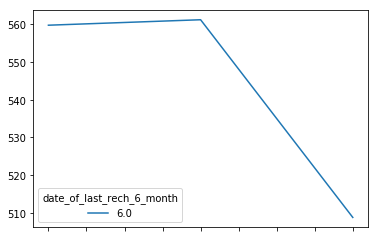

In [61]:
pv = pd.pivot_table(telecom_data_high_value, columns='date_of_last_rech_6_month',
                    values=['arpu_6', 'arpu_7', 'arpu_8']  , aggfunc='mean')
pv
pv.plot(legend=True)

**Lets see the trend accross incomming and outgoing calls**

    I see a sharp decline in og and inc calls from first two to third month

In [64]:
# let's first observe the number of mean outgoing calls across month
print(telecom_data_high_value.groupby('date_of_last_rech_6_month').loc_og_mou_6.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_7_month').loc_og_mou_7.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_8_month').loc_og_mou_8.mean().round(2))

date_of_last_rech_6_month
6.0    259.01
Name: loc_og_mou_6, dtype: float64
date_of_last_rech_7_month
7.0    259.85
Name: loc_og_mou_7, dtype: float64
date_of_last_rech_8_month
8.0    246.17
Name: loc_og_mou_8, dtype: float64


In [65]:
# let's first observe the number of mean incoming calls across month
print(telecom_data_high_value.groupby('date_of_last_rech_6_month').total_ic_mou_6.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_7_month').total_ic_mou_7.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_8_month').total_ic_mou_8.mean().round(2))

date_of_last_rech_6_month
6.0    290.78
Name: total_ic_mou_6, dtype: float64
date_of_last_rech_7_month
7.0    297.72
Name: total_ic_mou_7, dtype: float64
date_of_last_rech_8_month
8.0    284.2
Name: total_ic_mou_8, dtype: float64


**Lets see some univariate analysis on Avarage Revenue per User**

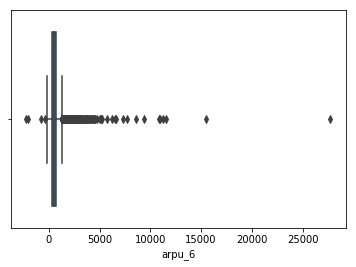

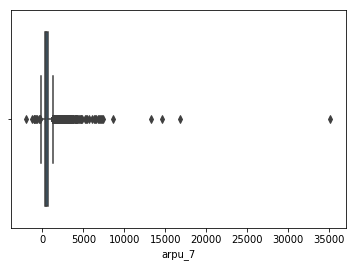

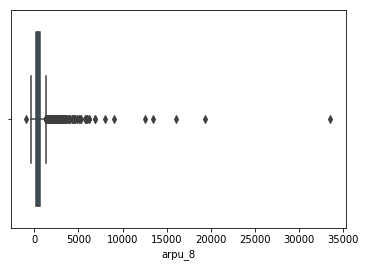

In [67]:
sns.boxplot(telecom_data_high_value['arpu_6'])
plt.show()
sns.boxplot(telecom_data_high_value['arpu_7'])
plt.show()
sns.boxplot(telecom_data_high_value['arpu_8'])
plt.show()

**Dropping unnecessary columns**

In [68]:
##Dropping av_rech_amt_data_mnth column since we already have created KPI for total.
##Dropping decile column since it is no longer necessary

telecom_data_high_value.drop(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'avg_rech_decile'], axis=1, inplace= True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**Dropping columns with single vlaue diversity**
    
    circle_id        - single value '109'
    
**Replacing NULL value with '1':-**
    
    Categorical levels:-
    loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou
    
    '0' - signifies have done some calls per user (loc/std/mou).
    '1' - signifies have done none. (28 customers no loc_og or std_og or loc_ic).

In [69]:
telecom_data_high_value[['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].nunique()

circle_id         1
loc_og_t2o_mou    1
std_og_t2o_mou    1
loc_ic_t2o_mou    1
dtype: int64

In [70]:
telecom_data_high_value[['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].isnull().any()

circle_id         False
loc_og_t2o_mou     True
std_og_t2o_mou     True
loc_ic_t2o_mou     True
dtype: bool

In [71]:
## Dropping circle id
telecom_data_high_value.drop( 'circle_id', axis=1, inplace= True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
##replacing null in 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'

telecom_data_high_value[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']] = telecom_data_high_value[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].replace(np.nan, 1, regex=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [74]:
for x in ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']:
    print(telecom_data_high_value.groupby(x).size())

loc_og_t2o_mou
0.0    29730
1.0      223
dtype: int64
std_og_t2o_mou
0.0    29730
1.0      223
dtype: int64
loc_ic_t2o_mou
0.0    29730
1.0      223
dtype: int64


#### Creating CHURN indictor-

    We are now going to define the churn indicator :
    Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even 
    once in the churn phase. The attributes you need to use to tag churners are:
   
    Columns to consider:-
    a. total_ic_mou_9
    b. total_og_mou_9
    c. vol_2g_mb_9
    d. vol_3g_mb_9

In [77]:
## There is no NULL value - so pre processing require
telecom_data_high_value[['total_ic_mou_9','total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].isnull().any()

total_ic_mou_9    False
total_og_mou_9    False
vol_2g_mb_9       False
vol_3g_mb_9       False
dtype: bool

In [78]:
def churnind(telecom_data_high_value):
    if ((telecom_data_high_value.total_ic_mou_9 == 0) & (telecom_data_high_value.total_og_mou_9 == 0) & (telecom_data_high_value.vol_2g_mb_9 == 0) & (telecom_data_high_value.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0

In [79]:
telecom_data_high_value['CHURN_IND'] = telecom_data_high_value.apply(churnind, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
#Churn indicator split
telecom_data_high_value.groupby('CHURN_IND').size()

CHURN_IND
0    27520
1     2433
dtype: int64

In [81]:
## So we have now 2433 churner which makes ~8% of the total high value customers

**Dropping columns**

In [82]:
## Since we are done with generating the KPIs and required parameters, we will drop all _9 columns

In [83]:
telecom_tobedel = telecom_data_high_value.filter(regex='_9')
telecom_tobedel.columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [137]:
telecom_data_new  = telecom_data_high_value.drop(telecom_tobedel.columns, axis=1)

In [138]:
### Deleting Date columns since we have already generated the required KPIs

In [139]:
### Drop date variables since we have already used it to create recency and frequency -
telecom_data_new.drop(['last_date_of_month_6',
'last_date_of_month_7',
'last_date_of_month_8',
'date_of_last_rech_6',
'date_of_last_rech_7',
'date_of_last_rech_8',
'date_of_last_rech_data_6',
'date_of_last_rech_data_7',
'date_of_last_rech_data_8',
'date_of_last_rech_6_month',
'date_of_last_rech_8_month',
'date_of_last_rech_7_month'],axis=1, inplace = True)

In [140]:
telecom_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 164 entries, mobile_number to CHURN_IND
dtypes: float64(134), int32(1), int64(27), timedelta64[ns](2)
memory usage: 38.8 MB


    We now have reduced the varaibles to 164 -
        Next, we will segregate the numeric and categoric variables and make some EDA

**converting the recency column to numeric type**

In [141]:
#Extracting only the numeric part of recency column -

In [142]:
telecom_data_new['Recency_last_recharge_voice'] = telecom_data_new['Recency_last_recharge_voice'].astype('str')

In [143]:
telecom_data_new['Recency_last_recharge_data'] = telecom_data_new['Recency_last_recharge_data'].astype('str')

In [144]:
telecom_data_new['Recency_last_recharge_data'] = telecom_data_new['Recency_last_recharge_data'].replace('NaT', '0 days', regex=True)

In [145]:
telecom_data_new['Recency_last_recharge_voice'] = telecom_data_new['Recency_last_recharge_voice'].apply(lambda x: pd.to_numeric(x.split(" ")[0]))

In [146]:
telecom_data_new['Recency_last_recharge_data'] = telecom_data_new['Recency_last_recharge_data'].apply(lambda x: pd.to_numeric(x.split(" ")[0]))

In [147]:
telecom_data_new[['Recency_last_recharge_voice','Recency_last_recharge_data']].head()

,Recency_last_recharge_voice,Recency_last_recharge_data
0,23,23
7,5,0
8,1,8
21,0,0
23,7,25


**Creating seperate List for categorical and numeric variables**

In [148]:
### Categorical List

In [149]:
cat_list = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'night_pck_user_6', 'night_pck_user_7','night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8','CHURN_IND']
cat_list

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'CHURN_IND']

In [150]:
numlist = []
for x in telecom_data_new.columns:
    if x not in(cat_list):
        numlist.append(x)
numlist

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 '

**Working with Numerical variables**

**Checking for NULL values**
-- We see lots of NULL values specifically in 2g and 3g columns

In [157]:
#Creating a dataset out of the SUM of NULLs
no_of_null = pd.DataFrame(telecom_data_new[numlist].isnull().sum(axis=0)).reset_index()
no_of_null.rename(columns={ no_of_null.columns[0]: "Attributes",no_of_null.columns[1]: "NoOfNulls"},inplace=True)

In [159]:
#Taking columns where > 0.7 percentile rows are NA:-
#no_of_null[no_of_null['NoOfNulls'] > 0].head()
no_of_null.sort_values(by ='NoOfNulls', ascending=False).head(20)

,Attributes,NoOfNulls
126,arpu_3g_8,14018
111,max_rech_data_8,14018
114,count_rech_2g_8,14018
129,arpu_2g_8,14018
117,count_rech_3g_8,14018
124,arpu_3g_6,13213
127,arpu_2g_6,13213
112,count_rech_2g_6,13213
115,count_rech_3g_6,13213
109,max_rech_data_6,13213


In [160]:
## Replacing Numeric 'NaN' values as ZEROs to avoid computational error

In [161]:
telecom_data_new[numlist] = telecom_data_new[numlist].replace(np.nan, 0, regex=True)

In [162]:
telecom_data_new[numlist].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 154 entries, mobile_number to Recency_last_recharge_data
dtypes: float64(125), int32(1), int64(28)
memory usage: 36.6 MB


### Merging the 2G and 3G columns 

In [188]:
telecom_data_new['arpu_2g_3g_8'] = telecom_data_new.apply(lambda x: (x['arpu_3g_8']+x['arpu_2g_8']),axis =1)

In [189]:
telecom_data_new['arpu_2g_3g_7'] = telecom_data_new.apply(lambda x: (x['arpu_3g_7']+x['arpu_2g_7']),axis =1)

In [190]:
telecom_data_new['arpu_2g_3g_6'] = telecom_data_new.apply(lambda x: (x['arpu_3g_6']+x['arpu_2g_6']),axis =1)

In [191]:
telecom_data_new['count_rech_2g_3g_8'] = telecom_data_new.apply(lambda x: (x['count_rech_2g_8']+x['count_rech_3g_8']),axis =1)

In [192]:
telecom_data_new['count_rech_2g_3g_7'] = telecom_data_new.apply(lambda x: (x['count_rech_2g_7']+x['count_rech_3g_7']),axis =1)

In [193]:
telecom_data_new['count_rech_2g_3g_6'] = telecom_data_new.apply(lambda x: (x['count_rech_2g_6']+x['count_rech_3g_6']),axis =1)

In [ ]:
###dropping the individual columns

In [194]:
telecom_data_new.drop(['arpu_3g_8','arpu_2g_8','arpu_3g_7','arpu_2g_7', 'arpu_3g_6','arpu_2g_6','count_rech_2g_8','count_rech_3g_8', 'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_2g_6', 'count_rech_3g_6'], axis =1, inplace= True)

**Univariate Analysis of numeric attributes**

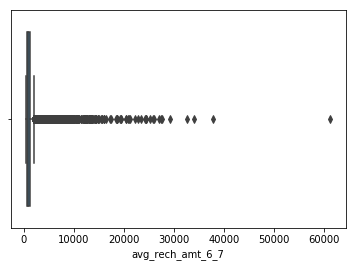

In [165]:
sns.boxplot(telecom_data_high_value['avg_rech_amt_6_7'])
plt.show()

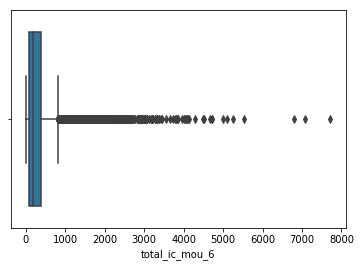

In [166]:
sns.boxplot(telecom_data_high_value['total_ic_mou_6'])
plt.show()

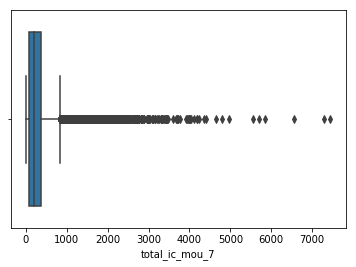

In [167]:
sns.boxplot(telecom_data_high_value['total_ic_mou_7'])
plt.show()

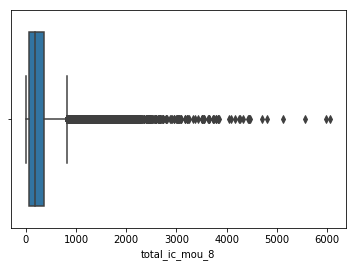

In [168]:
sns.boxplot(telecom_data_high_value['total_ic_mou_8'])
plt.show()

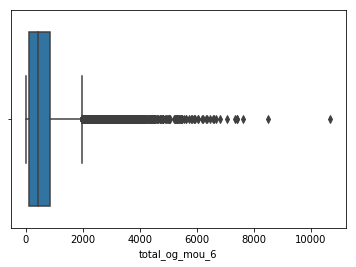

In [169]:
sns.boxplot(telecom_data_high_value['total_og_mou_6'])
plt.show()

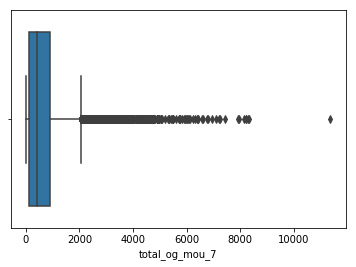

In [170]:
sns.boxplot(telecom_data_high_value['total_og_mou_7'])
plt.show()

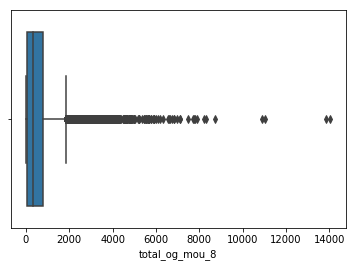

In [171]:
sns.boxplot(telecom_data_high_value['total_og_mou_8'])
plt.show()

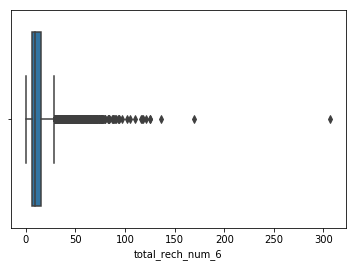

In [172]:
sns.boxplot(telecom_data_high_value['total_rech_num_6'])
plt.show()

**We can see outliers in numeric attributes** - needs outlier treatment

In [175]:
#taking all numeric attributes except mobile_number
numlist_f = numlist[1:]
numlist_f

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'to

In [176]:
#Handling Outliers - Numeric variables
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.90))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [177]:
telecom_data_new[numlist_f]=telecom_data_new[numlist_f].apply(lambda x: outlier_capping(x))

**Working with categorical varaibles**

In [180]:
telecom_data_new[cat_list].head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,CHURN_IND
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1
7,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
8,0.0,0.0,0.0,NaN,0.0,0.0,NaN,1.0,1.0,0
21,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
23,0.0,0.0,0.0,NaN,0.0,0.0,NaN,1.0,1.0,0


In [181]:
telecom_data_new[cat_list].isnull().any()

loc_og_t2o_mou      False
std_og_t2o_mou      False
loc_ic_t2o_mou      False
night_pck_user_6     True
night_pck_user_7     True
night_pck_user_8     True
fb_user_6            True
fb_user_7            True
fb_user_8            True
CHURN_IND           False
dtype: bool

**missing values can be imputed with '-1' where -1 can be treated as a new category**

In [182]:
list_to_replace = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

In [183]:
telecom_data_new[list_to_replace] = telecom_data_new[list_to_replace].replace(np.nan, -1, regex=True)

    There are multiple columns which have only single value type - we can drop them.

In [59]:
singlelist=[]
for x in telecom_data_new.columns:
    if (telecom_data_new[x].nunique() == 1):
        singlelist.append(x)

print (singlelist)

['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'og_others_7', 'og_others_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'sachet_3g_8']


In [60]:
telecom_data_new.drop(singlelist,axis=1, inplace=True)

In [61]:
for x in cat_list:
    print(x)
    print(telecom_data_new[x].unique())

loc_og_t2o_mou
[0. 1.]
std_og_t2o_mou
[0. 1.]
loc_ic_t2o_mou
[0. 1.]
night_pck_user_6
[ 0. -1.  1.]
night_pck_user_7
[ 0. -1.  1.]
night_pck_user_8
[ 0. -1.  1.]
fb_user_6
[ 1. -1.  0.]
fb_user_7
[ 1. -1.  0.]
fb_user_8
[ 1. -1.  0.]
CHURN_IND
[1 0]


In [62]:
cat_list1 = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']
cat_list2 = ['night_pck_user_6','night_pck_user_7', 'night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]

In [63]:
telecom_data_new.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,avg_rech_amt_6_7,Frequency_recharge,Recency_last_recharge,CHURN_IND
0,7000842753,0.0,0.0,0.0,197.3850,214.8160,213.8030,0.00,0.00,0.00,...,30.40,0.00,101.20,0.91,252.0,252.0,559.0,3.0,2.0,1
7,7000701601,0.0,0.0,0.0,994.4086,996.1706,977.5464,57.84,54.68,52.29,...,57.74,19.38,18.74,0.00,0.0,0.0,1185.0,3.0,0.0,1
8,7001524846,0.0,0.0,0.0,378.7210,492.2230,137.3620,413.69,351.03,35.08,...,21.03,611.80,122.16,0.00,0.0,354.0,696.0,3.0,0.0,0
21,7002124215,0.0,0.0,0.0,514.4530,597.7530,637.7600,102.41,132.11,85.14,...,0.00,0.00,0.00,0.00,0.0,0.0,640.0,3.0,0.0,0
23,7000887461,0.0,0.0,0.0,74.3500,193.8970,366.9660,48.96,50.66,33.58,...,40.45,51.86,0.00,0.00,0.0,712.0,583.0,3.0,2.0,0


In [64]:
for catvar in cat_list2:
    print(catvar)
    to = telecom_data_new.groupby([catvar, 'CHURN_IND']).agg({'mobile_number': 'sum'})
    # Change: groupby state_office and divide by sum
    to_pcts = to.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
    pct0 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts[catvar] == 0.0)].round(1)
    pct1 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts[catvar] == 1.0)].round(1)
    pct3 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts[catvar] == -1.0)].round(1)
    var0 = float(pct0)
    var1 = float(pct1)
    var2 = float(pct3)
    print(var0)
    print(var1)
    print(var2)
    telecom_data_new[catvar].replace({0.0 : var0, 1.0 : var1, -1.0 : var2}, axis=1,inplace=True)

night_pck_user_6
6.7
9.3
9.8
night_pck_user_7
5.6
6.1
11.5
night_pck_user_8
2.9
2.6
14.1
fb_user_6
7.7
6.7
9.8
fb_user_7
6.6
5.5
11.5
fb_user_8
6.8
2.4
14.1


C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:4480: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warnings.warn('the "axis" argument is deprecated '


In [65]:
for catvar in cat_list1:
    print(catvar)
    to = telecom_data_new.groupby([catvar, 'CHURN_IND']).agg({'mobile_number': 'sum'})
    # Change: groupby state_office and divide by sum
    to_pcts = to.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
    print(to_pcts)
    pct0 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts[catvar] == 0.0)].round(1)
    pct1 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts[catvar] == 1.0)].round(1)
    var0 = float(pct0)
    var1 = float(pct1)
    print(var0)
    print(var1)
    telecom_data_new[catvar].replace({0.0 : var0, 1.0 : var1}, axis=1,inplace=True)

loc_og_t2o_mou
   loc_og_t2o_mou  CHURN_IND  mobile_number
0             0.0          0      92.122510
1             0.0          1       7.877490
2             1.0          0      59.193219
3             1.0          1      40.806781
7.9
40.8
std_og_t2o_mou
   std_og_t2o_mou  CHURN_IND  mobile_number
0             0.0          0      92.122510
1             0.0          1       7.877490
2             1.0          0      59.193219
3             1.0          1      40.806781
7.9
40.8
loc_ic_t2o_mou
   loc_ic_t2o_mou  CHURN_IND  mobile_number
0             0.0          0      92.122510
1             0.0          1       7.877490
2             1.0          0      59.193219
3             1.0          1      40.806781
7.9
40.8


C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:4480: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warnings.warn('the "axis" argument is deprecated '


In [66]:
for x in cat_list:
    print(x)

loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
night_pck_user_6
night_pck_user_7
night_pck_user_8
fb_user_6
fb_user_7
fb_user_8
CHURN_IND


In [67]:
telecom_data_new['night_pck_user_6'].head()

0     6.7
7     9.8
8     9.8
21    9.8
23    9.8
Name: night_pck_user_6, dtype: float64

In [68]:
cols = telecom_data_new.columns.difference( ['CHURN_IND', 'mobile_number'] )

In [69]:
X = telecom_data_new[cols ]
Y = telecom_data_new['CHURN_IND']
df_test = telecom_data_new[cols ][telecom_data_new.CHURN_IND == 0]
df_test_mobile = telecom_data_new['mobile_number' ][telecom_data_new.CHURN_IND == 0]

In [70]:
X.count()[0]

29953

In [71]:
df_test.count()[0]

27520

#### Standardizing the data

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
sc=StandardScaler()

In [74]:
x_train_scaled=sc.fit_transform(X)

In [75]:
len(x_train_scaled)

29953

In [76]:
x_test_scaled=sc.fit_transform(df_test)

#### Dividing the data into train and test

In [77]:



train_X, test_X, train_y, test_y = train_test_split( x_train_scaled,
                                                  Y,
                                                  test_size = 0.3,
                                                  random_state = 123)

In [78]:
print(len(train_X), len(test_X))

20967 8986


#### Applying SMOTE

In [79]:

sm = SMOTE(random_state=123, ratio = 1)
x_train_res, y_train_res = sm.fit_sample(train_X,  train_y)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [80]:
len(x_train_res)

38464

In [81]:
import numpy as np
y = np.bincount(y_train_res)
ii = np.nonzero(y)[0]

In [82]:
np.vstack((ii,y[ii])).T

array([[    0, 19232],
       [    1, 19232]], dtype=int64)

#### Applying PCA

In [84]:
var_ratio={}
for n in range(2,50):
    pca = PCA(n_components=n, random_state = 123)
    telePCA = pca.fit(x_train_res)
    var_ratio[n]=sum(telePCA.explained_variance_ratio_)

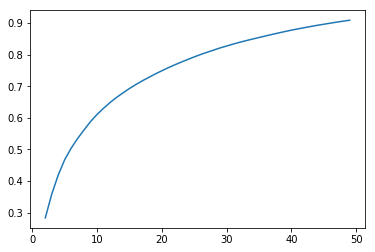

In [85]:
#Making the screeplot - plotting the cumulative variance against the number of components
pd.Series(var_ratio).plot()

In [86]:
var_ratio

{2: 0.282859766808621,
 3: 0.3584990880090133,
 4: 0.41880564004290455,
 5: 0.4675725753979738,
 6: 0.5040351279048497,
 7: 0.5347251708988942,
 8: 0.562121853433149,
 9: 0.5884926325877227,
 10: 0.6107791910278545,
 11: 0.6303846047423864,
 12: 0.6484190176286424,
 13: 0.6646606604768486,
 14: 0.6790944492381287,
 15: 0.6929287224791912,
 16: 0.7056068862575803,
 17: 0.7174152938971766,
 18: 0.7282740771473203,
 19: 0.7391527113745131,
 20: 0.7491327783382492,
 21: 0.7587992201461405,
 22: 0.7679624939261923,
 23: 0.7765519615515425,
 24: 0.7848929919799643,
 25: 0.7930122374522738,
 26: 0.8007128911026582,
 27: 0.8077975159071191,
 28: 0.8146834494645233,
 29: 0.8215048024740415,
 30: 0.8274524057795911,
 31: 0.8336061181537001,
 32: 0.8392446691493576,
 33: 0.8444740373953712,
 34: 0.8495632473087333,
 35: 0.8544211492429163,
 36: 0.8594520054804149,
 37: 0.8640804965259085,
 38: 0.8688612069875193,
 39: 0.8733493080069525,
 40: 0.8777719619907633,
 41: 0.8817384571259157,
 42: 0.88

In [87]:
#90% variance
pc_final=PCA(n_components=45).fit(x_train_res)
df_train_pca=pc_final.fit_transform(x_train_res)

In [88]:
df_train_pca.shape

(38464, 45)

In [89]:
x_train_scaled.shape

(29953, 149)

In [90]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' + str(i) for i in range(45)], index=cols)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44
Frequency_recharge,-0.039051,0.086770,-0.014463,0.225280,0.075888,-0.250306,0.035055,-0.094603,-0.209210,-0.005862,...,-0.021137,0.032380,-0.032253,0.017060,0.033666,-0.025359,0.001804,-0.025907,-0.033263,0.028306
Recency_last_recharge,0.028948,-0.063738,0.076530,-0.110804,-0.038084,0.093334,-0.058429,-0.037361,0.097325,0.080057,...,0.121952,-0.035050,-0.087950,-0.054765,-0.041733,0.043542,0.075546,-0.072250,-0.086470,0.021587
aon,-0.020165,0.073868,-0.004156,-0.062643,-0.012975,-0.077062,0.022153,-0.037723,0.008981,-0.031374,...,0.247982,-0.190077,-0.100563,-0.240321,0.032457,0.343995,-0.229258,-0.653631,-0.243925,-0.017263
arpu_2g_6,0.109561,0.089582,0.105082,0.027676,-0.103513,0.144812,-0.014130,0.007412,-0.001960,-0.076619,...,0.070096,0.011102,0.057327,0.036122,0.008664,0.031725,0.000987,-0.013194,0.066657,0.024560
arpu_2g_7,0.093703,0.101507,0.082448,0.080811,-0.088583,0.039982,-0.074046,0.025838,-0.007171,0.187186,...,-0.033450,0.013858,-0.034714,-0.018999,0.004434,0.047512,-0.071068,0.026971,-0.011119,0.020474
arpu_2g_8,0.065787,0.104279,0.064554,0.087007,-0.069927,0.019023,-0.037109,0.003421,-0.033651,-0.011620,...,-0.059508,0.008639,0.020269,-0.023321,-0.010032,-0.066910,0.081042,-0.043768,-0.058256,-0.022632
arpu_3g_6,0.107101,0.092216,0.113307,0.026885,-0.110565,0.142152,-0.021318,0.008955,-0.000448,-0.070052,...,0.077658,-0.020869,0.050669,0.040900,0.019244,0.022134,-0.012386,-0.010345,0.056343,0.025659
arpu_3g_7,0.092185,0.104149,0.090783,0.077201,-0.098039,0.043445,-0.077431,0.025498,-0.001848,0.181972,...,-0.035216,-0.009031,-0.045853,-0.019870,0.006861,0.043827,-0.071381,0.024916,0.001262,0.025426
arpu_3g_8,0.064972,0.105985,0.069711,0.083490,-0.077465,0.020347,-0.038905,0.004587,-0.027841,-0.010647,...,-0.055660,-0.006294,0.008873,-0.029009,-0.013399,-0.054005,0.095632,-0.046509,-0.048715,-0.013961
arpu_6,-0.114306,0.022251,0.085423,-0.019999,-0.068941,0.223124,0.049078,-0.027681,-0.174127,-0.109449,...,-0.041259,-0.073278,-0.053766,0.058322,0.026358,0.051865,0.059559,0.018142,-0.009817,0.013850


In [91]:
df_test_pca = pc_final.fit_transform(test_X)
df_test_pca.shape

(8986, 45)

In [92]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

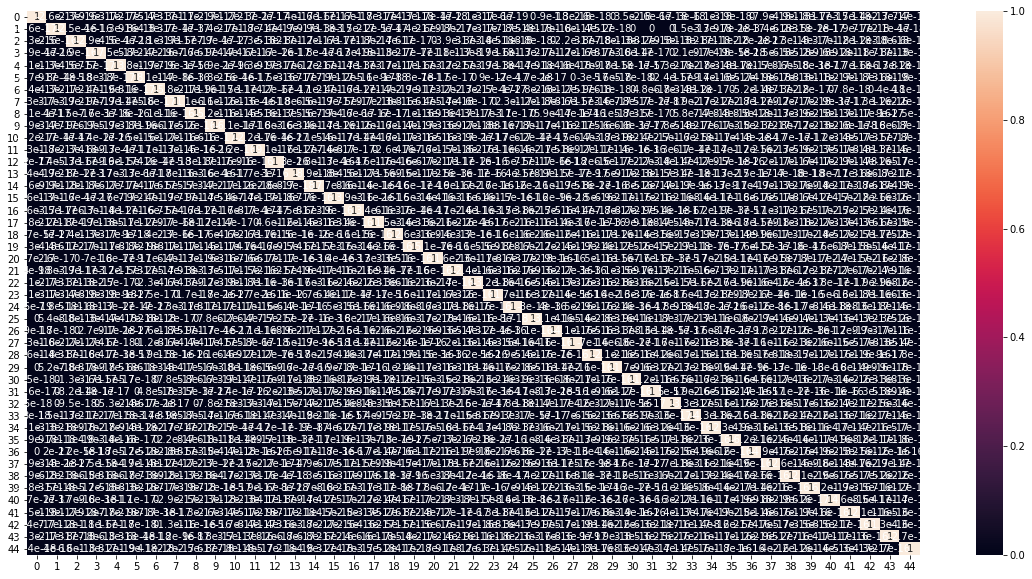

In [93]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [94]:
pd.Series(pc_final.explained_variance_ratio_,index=['PC_' + str(i) for i in range(45)])

PC_0     0.156366
PC_1     0.125730
PC_2     0.069452
PC_3     0.058111
PC_4     0.038364
PC_5     0.028400
PC_6     0.026182
PC_7     0.023483
PC_8     0.022332
PC_9     0.020297
PC_10    0.018610
PC_11    0.017182
PC_12    0.016506
PC_13    0.015861
PC_14    0.015581
PC_15    0.014652
PC_16    0.013610
PC_17    0.012421
PC_18    0.011381
PC_19    0.011001
PC_20    0.010246
PC_21    0.009862
PC_22    0.009497
PC_23    0.009126
PC_24    0.008825
PC_25    0.008662
PC_26    0.007170
PC_27    0.007119
PC_28    0.006784
PC_29    0.006628
PC_30    0.006503
PC_31    0.006257
PC_32    0.006170
PC_33    0.006017
PC_34    0.005969
PC_35    0.005540
PC_36    0.005401
PC_37    0.005364
PC_38    0.005080
PC_39    0.004955
PC_40    0.004914
PC_41    0.004597
PC_42    0.004461
PC_43    0.004265
PC_44    0.004131
dtype: float64

In [108]:
y_train_res.label

AttributeError: 'numpy.ndarray' object has no attribute 'label'

In [98]:
#Training the model on the train data

logsk = LogisticRegression()
logsk.fit(df_train_pca,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Making Predictions

In [99]:
# Predicted probabilities
y_pred = logsk.predict_proba(df_test_pca)

In [100]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [101]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [102]:
# Let's see the head
y_pred_1.head()

,1
0,0.026762
1,0.816596
2,0.005246
3,0.412617
4,0.996671


In [103]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(test_y)

In [104]:
y_test_df.head()

,CHURN_IND
94436,0
72272,0
56618,0
56539,0
19506,0


In [105]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [106]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [107]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [108]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CHURN_IND,Churn_Prob
0,0,0.026762
1,0,0.816596
2,0,0.005246
3,0,0.412617
4,0,0.996671


In [109]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [110]:
# Let's see the head
y_pred_final.head()

,CHURN_IND,Churn_Prob,predicted
0,0,0.026762,0
1,0,0.816596,1
2,0,0.005246,0
3,0,0.412617,0
4,0,0.996671,1


### Model Evaluation

In [111]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.CHURN_IND, y_pred_final.predicted )
confusion

array([[4731, 3557],
       [  94,  604]], dtype=int64)

Text(0.5,15,'Predicted label')

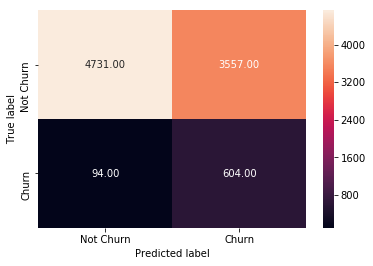

In [113]:
sns.heatmap(confusion, annot=True,  fmt='.2f', xticklabels = ["Not Churn", "Churn"] , yticklabels = ["Not Churn", "Churn"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [114]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.CHURN_IND, y_pred_final.predicted)

0.5937013131537948

In [115]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9805181347150259

In [117]:
# Let us calculate specificity
TN / float(TN+FP)

0.14515741408315308

In [118]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.8548425859168469


In [119]:
# positive predictive value 
print (TP / float(TP+FP))

0.5708252895752896


In [120]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8653295128939829


### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [121]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

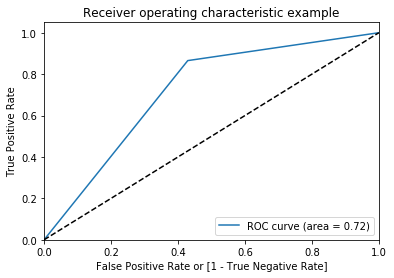

(array([0.        , 0.42917471, 1.        ]),
 array([0.        , 0.86532951, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [122]:
draw_roc(y_pred_final.CHURN_IND, y_pred_final.predicted)

### Finding Optimal Cutoff Point

In [123]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,CHURN_IND,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.026762,0,1,0,0,0,0,0,0,0,0,0
1,0,0.816596,1,1,1,1,1,1,1,1,1,1,0
2,0,0.005246,0,1,0,0,0,0,0,0,0,0,0
3,0,0.412617,0,1,1,1,1,1,0,0,0,0,0
4,0,0.996671,1,1,1,1,1,1,1,1,1,1,1


In [124]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.CHURN_IND, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.077676  0.000000  1.000000
0.1   0.1  0.312820  0.257481  0.969914
0.2   0.2  0.403962  0.357987  0.949857
0.3   0.3  0.478411  0.440999  0.922636
0.4   0.4  0.541620  0.512066  0.892550
0.5   0.5  0.593701  0.570825  0.865330
0.6   0.6  0.642666  0.626931  0.829513
0.7   0.7  0.699755  0.692809  0.782235
0.8   0.8  0.746272  0.750483  0.696275
0.9   0.9  0.803249  0.823721  0.560172


C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


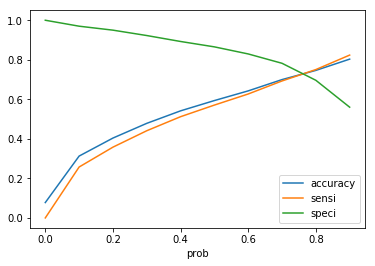

In [125]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [135]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)

In [136]:
y_pred_final.head()

,CHURN_IND,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.026762,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.816596,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.005246,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.412617,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.996671,1,1,1,1,1,1,1,1,1,1,1,1


In [137]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.CHURN_IND, y_pred_final.final_predicted)

0.5507456042733141

In [138]:
cm = metrics.confusion_matrix( y_pred_final.CHURN_IND, y_pred_final.final_predicted )
cm

array([[4329, 3959],
       [  78,  620]], dtype=int64)

Text(0.5,15,'Predicted label')

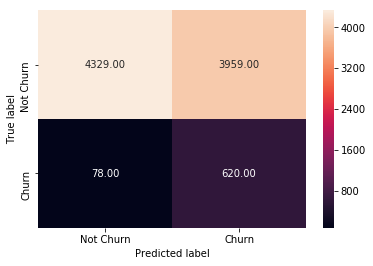

In [139]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Not Churn", "Churn"] , yticklabels = ["Not Churn", "Churn"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Building Decision Tree Model

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [141]:
param_grid = {'max_depth': np.arange(3, 30)}

In [142]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10)
tree.fit( df_train_pca, y_train_res )

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [143]:
tree.best_params_

{'max_depth': 29}

In [144]:
tree.best_score_

0.9052100665557404

### Building Final Decision Tree Model

In [151]:
clf_tree = DecisionTreeClassifier( max_depth = 29 )
clf_tree.fit( df_train_pca, y_train_res )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=29,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [152]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( df_test_pca ) } )

In [153]:
tree_test_pred.sample( n = 10 )

,actual,predicted
59573,0,0
38565,0,0
51229,0,0
65920,0,1
79508,0,0
99641,0,0
46810,0,1
90194,1,0
55823,0,0
74085,1,1


In [154]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.7023147117738705

Text(0.5,15,'Predicted label')

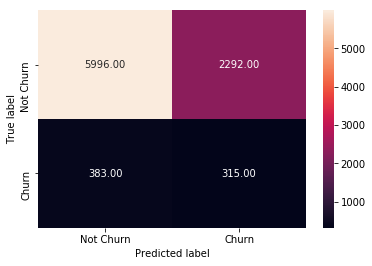

In [156]:
tree_cm = metrics.confusion_matrix( tree_test_pred.actual, tree_test_pred.predicted,
                                 [0,1] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Not Churn", "Churn"] , yticklabels = ["Not Churn", "Churn"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Bagged decision trees (with B=10)

In [159]:
bagclm = BaggingClassifier(oob_score=True, n_estimators=100)
bagclm.fit(df_train_pca, y_train_res)

y_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': bagclm.predict( df_test_pca) } )

KeyboardInterrupt: 

In [ ]:
bagclm.estimators_features_

In [ ]:
metrics.accuracy_score( y_pred.actual, y_pred.predicted )

In [ ]:
tree_bg = metrics.confusion_matrix( y_pred.predicted,
                                 y_pred.actual,
                                 [1,0] )
sn.heatmap(tree_bg, annot=True,
         fmt='.2f',
         xticklabels = ["Churn", "Not Churn"] , yticklabels = ["Churn", "Not Churn"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
# compute the out-of-bag accuracy for B=500
bagclm.oob_score_

### SVM

In [110]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='rbf')
model.fit(df_train_pca, y_train_res)
y_pred = model.predict(df_test_pca)

In [111]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=test_y, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=test_y, y_pred=y_pred))

accuracy: 0.8310705541954151 

[[7264 1024]
 [ 494  204]]


In [ ]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 123)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(df_train_pca, y_train_res)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

In [ ]:
# model with optimal hyperparameters

# model
model = SVC(C=1000, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

